In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from matplotlib.ticker import MaxNLocator

In [2]:
df = pd.read_csv(r"file")

print(df.head())

          Company Name     ISIN Code Ticker Symbol       Country of Exchange  \
0           AMETEK Inc  US0311001004           AME  United States of America   
1             AT&T Inc  US00206R1023             T  United States of America   
2           AbbVie Inc  US00287Y1091          ABBV  United States of America   
3  Abbott Laboratories  US0028241000           ABT  United States of America   
4        Accenture PLC  IE00B4BNMY34           ACN  United States of America   

                        NAICS National Industry Name      MarketCap_2023  \
0  Instruments and Related Products Manufacturing...   38,042,120,972.13   
1  Wireless Telecommunications Carriers (except S...  119,977,000,000.00   
2           Pharmaceutical Preparation Manufacturing  273,529,283,999.60   
3  Electromedical and Electrotherapeutic Apparatu...  191,087,963,057.52   
4                   Computer Systems Design Services  215,084,209,469.64   

       MarketCap_2022      MarketCap_2021      MarketCap_2020 

In [3]:
# Convert wide format to long format
id_vars = ['Company Name', 'ISIN Code', 'Ticker Symbol', 'NAICS National Industry Name']#, 'Country of Exchange']

# Reshape EPS, ROA, and ROE
financial_ratios = ['EPS', 'ROA', 'ROE']
df_long = df[id_vars].copy()

for ratio in financial_ratios:
    value_vars = [col for col in df.columns if ratio in col]  # Select relevant columns
    if not value_vars:
        print(f"No columns found for {ratio}, skipping...")
        continue  # Skip if no matching columns are found
    temp = df.melt(id_vars=id_vars, value_vars=value_vars, var_name='Year', value_name=ratio)
    temp['Year'] = temp['Year'].str.extract(r'(\d+)').astype(float)  # Extract year
    temp.dropna(subset=['Year'], inplace=True)  # Ensure no NaN in Year
    temp['Year'] = temp['Year'].astype(int)  # Convert to integer
    if 'Year' not in df_long:
        df_long = temp
    else:
        df_long = df_long.merge(temp, on=id_vars + ['Year'], how='outer')

# Repeat for ESG scores
esg_scores = ['ESG_score', 'Env_score', 'Social_score', 'Gov_score', 'ESG_combined_score', 'MarketCap']
for esg in esg_scores:
    esg_cols = [col for col in df.columns if esg in col]
    if not esg_cols:
        print(f"No columns found for {esg}, skipping...")
        continue
    temp = df.melt(id_vars=id_vars, value_vars=esg_cols, var_name='Year', value_name=esg)
    temp['Year'] = temp['Year'].str.extract(r'(\d+)').astype(float)
    temp.dropna(subset=['Year'], inplace=True)
    temp['Year'] = temp['Year'].astype(int)
    df_long = df_long.merge(temp, on=id_vars + ['Year'], how='outer')

print(df_long)

     Company Name     ISIN Code Ticker Symbol  \
0      AMETEK Inc  US0311001004           AME   
1      AMETEK Inc  US0311001004           AME   
2      AMETEK Inc  US0311001004           AME   
3      AMETEK Inc  US0311001004           AME   
4      AMETEK Inc  US0311001004           AME   
...           ...           ...           ...   
6295     eBay Inc  US2786421030          EBAY   
6296     eBay Inc  US2786421030          EBAY   
6297     eBay Inc  US2786421030          EBAY   
6298     eBay Inc  US2786421030          EBAY   
6299     eBay Inc  US2786421030          EBAY   

                           NAICS National Industry Name  Year   EPS    ROA  \
0     Instruments and Related Products Manufacturing...  2004  0.39    NaN   
1     Instruments and Related Products Manufacturing...  2005  0.48   7.9%   
2     Instruments and Related Products Manufacturing...  2006  0.59   7.9%   
3     Instruments and Related Products Manufacturing...  2007  0.76   8.5%   
4     Instruments and

In [4]:
#renaming columnnames Social_score and ESG_combined_score s.t. they have the same names as the EU dataset

df_long = df_long.rename(columns={
    'Social_score': 'Soc_score',
    'ESG_combined_score': 'ESG_Comb_score'
})
df_long

,Company Name,ISIN Code,Ticker Symbol,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap
0,AMETEK Inc,US0311001004,AME,Instruments and Related Products Manufacturing...,2004,0.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,444,019,711.27"
1,AMETEK Inc,US0311001004,AME,Instruments and Related Products Manufacturing...,2005,0.48,7.9%,17.1%,NaN,NaN,NaN,NaN,NaN,"2,985,628,339.46"
2,AMETEK Inc,US0311001004,AME,Instruments and Related Products Manufacturing...,2006,0.59,7.9%,17.5%,NaN,NaN,NaN,NaN,NaN,"3,370,649,713.66"
3,AMETEK Inc,US0311001004,AME,Instruments and Related Products Manufacturing...,2007,0.76,8.5%,18.8%,NaN,NaN,NaN,NaN,NaN,"5,025,100,352.14"
4,AMETEK Inc,US0311001004,AME,Instruments and Related Products Manufacturing...,2008,0.94,8.3%,18.4%,16.64,7.74,24.66,16.81,16.64,"3,224,139,054.90"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,eBay Inc,US2786421030,EBAY,All Other Miscellaneous Retailers,2019,2.32,9.5%,32.2%,59.31,48.53,69.76,53.56,52.05,"29,376,389,699.94"
6296,eBay Inc,US2786421030,EBAY,All Other Miscellaneous Retailers,2020,2.83,11.8%,52.9%,61.07,46.78,71.57,56.42,36.79,"34,639,261,132.50"
6297,eBay Inc,US2786421030,EBAY,All Other Miscellaneous Retailers,2021,3.41,13.6%,86.6%,68.16,45.34,70.90,72.70,57.97,"41,629,251,436.50"
6298,eBay Inc,US2786421030,EBAY,All Other Miscellaneous Retailers,2022,4.02,11.6%,39.9%,73.74,48.67,72.87,82.00,63.64,"22,504,072,337.89"


In [5]:
df_long['MarketCap'] = df_long['MarketCap'].replace(',', '', regex=True).astype(float)

# Clean percentage strings in ROE, ROA, and EPS if necessary
for col in ['ROE', 'ROA', 'EPS']:
    df_long[col] = (
        df_long[col]
        .astype(str)                      # convert everything to string
        .str.replace('%', '', regex=False)  # remove %
        .str.replace(',', '.', regex=False)  # if commas are used as decimals
    )

    # Convert to float, coercing errors to NaN
    df_long[col] = pd.to_numeric(df_long[col], errors='coerce')

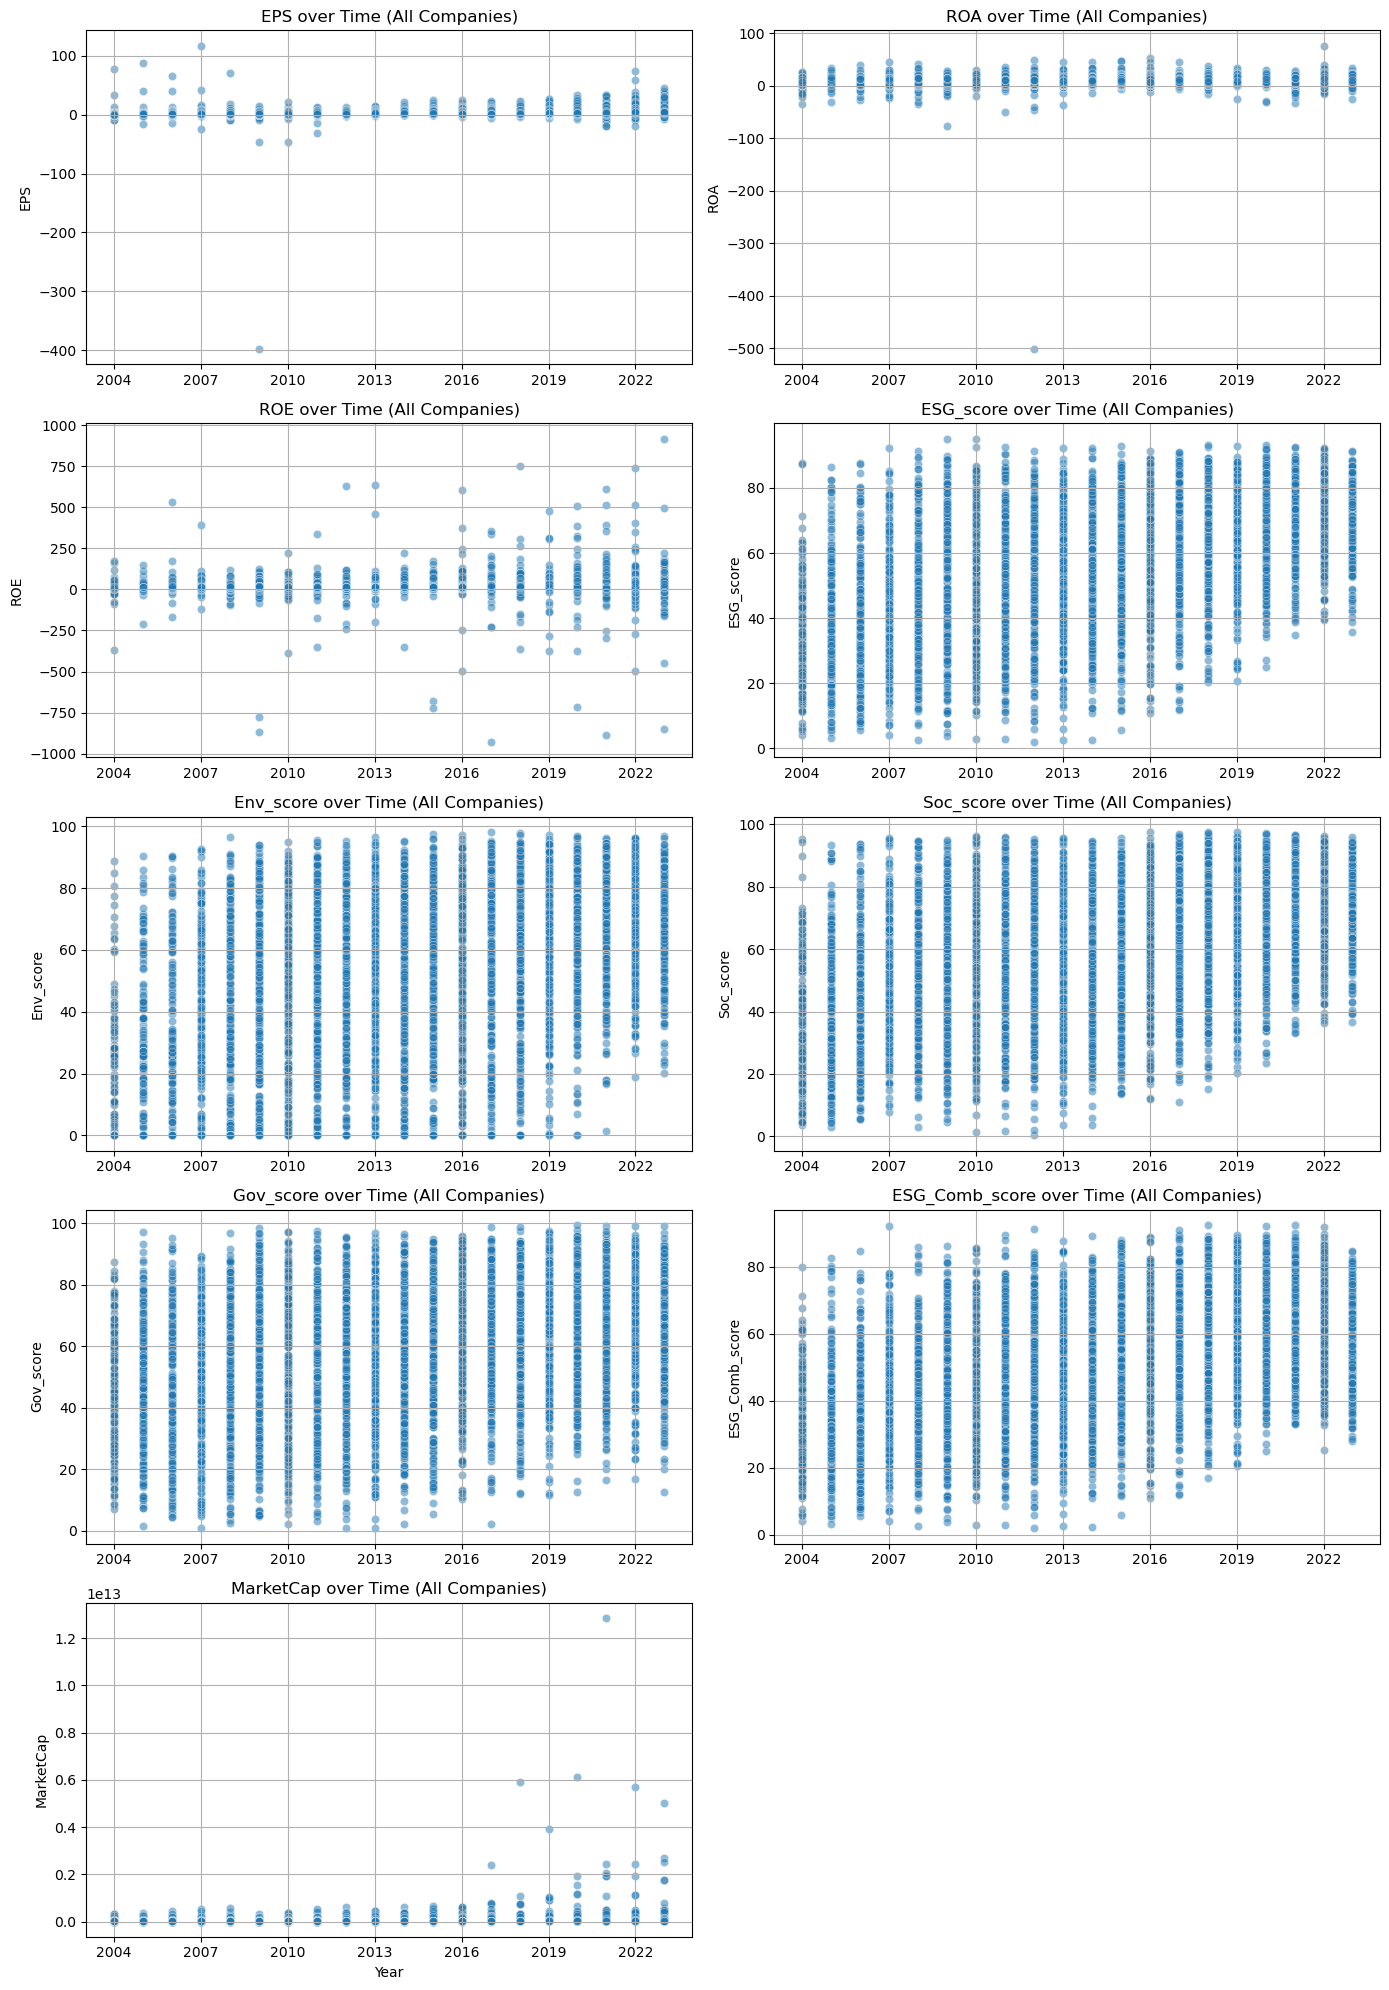

In [6]:
# Variables to plot
variables = ['EPS', 'ROA', 'ROE', 'ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score', 'MarketCap']

# Set up the subplot grid
n_vars = len(variables)
n_cols = 2
n_rows = (n_vars + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows), sharex=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through variables and create scatter plots
for i, var in enumerate(variables):
    sns.scatterplot(data=df_long, x='Year', y=var, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{var} over Time (All Companies)')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(var)
    axes[i].xaxis.set_major_locator(MaxNLocator(integer=True))
    axes[i].tick_params(labelbottom=True)  # <- Show x-axis labels
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
# plt.savefig("data_visualization_USA.png", dpi=300, bbox_inches="tight")
plt.show()

# Validity Check

### Check if ESG variables are between 0 - 100

In [9]:
# ESG columns to check
esg_columns = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Check for values outside [0, 100]
for col in esg_columns:
    invalid = df_long[(df_long[col] < 0) | (df_long[col] > 100)]
    if not invalid.empty:
        print(f"Out-of-range values found in '{col}':")
        print(invalid[['Ticker Symbol', 'Year', col]])
    else:
        print(f"All values in '{col}' are within the [0, 100] range.")


All values in 'ESG_score' are within the [0, 100] range.
All values in 'Env_score' are within the [0, 100] range.
All values in 'Soc_score' are within the [0, 100] range.
All values in 'Gov_score' are within the [0, 100] range.
All values in 'ESG_Comb_score' are within the [0, 100] range.


### check if Market capitalization is between valid range

In [11]:
invalid_marketcap = df_long[df_long['MarketCap'] < 0]

print(f"Invalid MarketCap: {len(invalid_marketcap)} rows")

Invalid MarketCap: 0 rows


### Check unreal fluctuations

In [13]:
import pandas as pd

# Sort the data by company and year
df_imputed_sorted = df_long.sort_values(by=['Company Name', 'Year']).copy()

# List of ESG-related columns to check
esg_columns = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Define threshold (adjustable)
threshold = 15

# Create a dictionary to store flagged rows
unreal_fluctuations_dict = {}

# Loop over each ESG column
for col in esg_columns:
    diff_col = f'{col}_diff'
    flag_col = f'{col}_unreal'
    
    # Calculate year-over-year difference
    df_imputed_sorted[diff_col] = df_imputed_sorted.groupby('Company Name')[col].diff()
    
    # Flag large changes
    df_imputed_sorted[flag_col] = df_imputed_sorted[diff_col].abs() > threshold
    
    # Store flagged rows for this ESG metric
    unreal_fluctuations_dict[col] = df_imputed_sorted[df_imputed_sorted[flag_col]]

    # Print how many rows were flagged
    print(f"{col}: {unreal_fluctuations_dict[col].shape[0]} unreal fluctuations (> {threshold} points)")

# Optional: view an example
df_imputed_sorted[['Company Name', 'Year'] + esg_columns + [f'{col}_diff' for col in esg_columns]]

ESG_score: 335 unreal fluctuations (> 15 points)
Env_score: 552 unreal fluctuations (> 15 points)
Soc_score: 462 unreal fluctuations (> 15 points)
Gov_score: 1287 unreal fluctuations (> 15 points)
ESG_Comb_score: 846 unreal fluctuations (> 15 points)


,Company Name,Year,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,ESG_score_diff,Env_score_diff,Soc_score_diff,Gov_score_diff,ESG_Comb_score_diff
0,AMETEK Inc,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AMETEK Inc,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AMETEK Inc,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AMETEK Inc,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AMETEK Inc,2008,16.64,7.74,24.66,16.81,16.64,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6295,eBay Inc,2019,59.31,48.53,69.76,53.56,52.05,2.19,0.82,2.07,2.73,-5.07
6296,eBay Inc,2020,61.07,46.78,71.57,56.42,36.79,1.76,-1.75,1.81,2.86,-15.26
6297,eBay Inc,2021,68.16,45.34,70.90,72.70,57.97,7.09,-1.44,-0.67,16.28,21.18
6298,eBay Inc,2022,73.74,48.67,72.87,82.00,63.64,5.58,3.33,1.97,9.30,5.67


In [14]:
# List of ESG variables and their corresponding flag columns
esg_columns = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']
flag_columns = [f'{col}_unreal' for col in esg_columns]

# Filter rows where all ESG variables have unreal fluctuations
all_unreal = df_imputed_sorted[df_imputed_sorted[flag_columns].all(axis=1)]

# Print the number of such rows
print(f"Number of rows with unreal fluctuations in ALL ESG variables: {all_unreal.shape[0]}")

# Optional: view a sample of these rows
all_unreal[['Company Name', 'Year'] + esg_columns + flag_columns]

Number of rows with unreal fluctuations in ALL ESG variables: 51


,Company Name,Year,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,ESG_score_unreal,Env_score_unreal,Soc_score_unreal,Gov_score_unreal,ESG_Comb_score_unreal
21,AT&T Inc,2005,39.37,18.44,37.06,60.05,39.37,True,True,True,True,True
123,Advanced Micro Devices Inc,2007,67.84,79.32,74.46,43.16,54.75,True,True,True,True,True
405,American Tower Corp,2009,49.52,19.81,65.64,69.05,49.52,True,True,True,True,True
593,Archer-Daniels-Midland Co,2017,78.77,77.18,74.78,87.43,78.77,True,True,True,True,True
688,AvalonBay Communities Inc,2012,73.56,65.95,82.17,74.36,73.56,True,True,True,True,True
865,Becton Dickinson and Co,2009,74.25,64.89,77.66,74.12,74.25,True,True,True,True,True
1006,Broadridge Financial Solutions Inc,2010,47.49,50.00,35.65,60.85,47.49,True,True,True,True,True
1016,Broadridge Financial Solutions Inc,2020,72.20,66.39,81.15,64.83,72.20,True,True,True,True,True
1103,CSX Corp,2007,55.03,39.71,57.86,69.74,52.52,True,True,True,True,True
1123,CVS Health Corp,2007,74.69,68.37,86.00,64.27,74.69,True,True,True,True,True


In [15]:
#Check how many unreal fluctuations a company has
# Count number of 'all unreal' rows per company
unreal_counts = all_unreal.groupby('Company Name').size().reset_index(name='Num_unreal_fluctuations')

# Sort by number of unreal fluctuations (optional)
unreal_counts = unreal_counts.sort_values(by='Num_unreal_fluctuations', ascending=False)

# Display the result
print(unreal_counts)

                          Company Name  Num_unreal_fluctuations
43              Unitedhealth Group Inc                        3
14                        Entergy Corp                        2
41              Trane Technologies PLC                        2
6   Broadridge Financial Solutions Inc                        2
34                      Public Storage                        2
0                             AT&T Inc                        1
26          Marriott International Inc                        1
27    Mettler-Toledo International Inc                        1
28                      Microsoft Corp                        1
29          Mondelez International Inc                        1
30  Norwegian Cruise Line Holdings Ltd                        1
31    PNC Financial Services Group Inc                        1
32                  PPG Industries Inc                        1
35               Quest Diagnostics Inc                        1
33                        Prologis Inc  

In [16]:
# Total number of rows per company (all years)
total_counts = df_imputed_sorted.groupby('Company Name').size().reset_index(name='Total_rows')

# Number of rows with all ESG variables unreal per company
unreal_counts = all_unreal.groupby('Company Name').size().reset_index(name='Unreal_fluctuations')

# Merge both counts
company_fluctuation_summary = pd.merge(unreal_counts, total_counts, on='Company Name')

# Optional: add a percentage column
company_fluctuation_summary['Percentage_unreal'] = (
    100 * company_fluctuation_summary['Unreal_fluctuations'] / company_fluctuation_summary['Total_rows']
).round(2)

# Sort by highest percentage of unreal fluctuations
company_fluctuation_summary = company_fluctuation_summary.sort_values(by='Percentage_unreal', ascending=False)

# Display
print(company_fluctuation_summary)

                          Company Name  Unreal_fluctuations  Total_rows  \
43              Unitedhealth Group Inc                    3          20   
14                        Entergy Corp                    2          20   
41              Trane Technologies PLC                    2          20   
6   Broadridge Financial Solutions Inc                    2          20   
34                      Public Storage                    2          20   
0                             AT&T Inc                    1          20   
26          Marriott International Inc                    1          20   
27    Mettler-Toledo International Inc                    1          20   
28                      Microsoft Corp                    1          20   
29          Mondelez International Inc                    1          20   
30  Norwegian Cruise Line Holdings Ltd                    1          20   
31    PNC Financial Services Group Inc                    1          20   
32                  PPG I

In [17]:
# List of ESG variables and their corresponding flag columns
esg_columns = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']
flag_columns = [f'{col}_unreal' for col in esg_columns]

# Filter rows where NOT all ESG variables have unreal fluctuations
df_filtered = df_imputed_sorted[~df_imputed_sorted[flag_columns].all(axis=1)]

# Print the number of rows removed
num_removed = df_imputed_sorted.shape[0] - df_filtered.shape[0]
print(f"Number of rows removed with unreal fluctuations in ALL ESG variables: {num_removed}")

Number of rows removed with unreal fluctuations in ALL ESG variables: 51


In [18]:
df_filtered

,Company Name,ISIN Code,Ticker Symbol,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,...,ESG_score_diff,ESG_score_unreal,Env_score_diff,Env_score_unreal,Soc_score_diff,Soc_score_unreal,Gov_score_diff,Gov_score_unreal,ESG_Comb_score_diff,ESG_Comb_score_unreal
0,AMETEK Inc,US0311001004,AME,Instruments and Related Products Manufacturing...,2004,0.39,NaN,NaN,NaN,NaN,...,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False
1,AMETEK Inc,US0311001004,AME,Instruments and Related Products Manufacturing...,2005,0.48,7.9,17.1,NaN,NaN,...,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False
2,AMETEK Inc,US0311001004,AME,Instruments and Related Products Manufacturing...,2006,0.59,7.9,17.5,NaN,NaN,...,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False
3,AMETEK Inc,US0311001004,AME,Instruments and Related Products Manufacturing...,2007,0.76,8.5,18.8,NaN,NaN,...,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False
4,AMETEK Inc,US0311001004,AME,Instruments and Related Products Manufacturing...,2008,0.94,8.3,18.4,16.64,7.74,...,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,eBay Inc,US2786421030,EBAY,All Other Miscellaneous Retailers,2019,2.32,9.5,32.2,59.31,48.53,...,2.19,False,0.82,False,2.07,False,2.73,False,-5.07,False
6296,eBay Inc,US2786421030,EBAY,All Other Miscellaneous Retailers,2020,2.83,11.8,52.9,61.07,46.78,...,1.76,False,-1.75,False,1.81,False,2.86,False,-15.26,True
6297,eBay Inc,US2786421030,EBAY,All Other Miscellaneous Retailers,2021,3.41,13.6,86.6,68.16,45.34,...,7.09,False,-1.44,False,-0.67,False,16.28,True,21.18,True
6298,eBay Inc,US2786421030,EBAY,All Other Miscellaneous Retailers,2022,4.02,11.6,39.9,73.74,48.67,...,5.58,False,3.33,False,1.97,False,9.30,False,5.67,False


# Outlier detection by using Boxplots, IQR-method per variable per company

In [20]:
df_imputed = df_filtered

In [21]:
import pandas as pd

# Define the columns you want to check for outliers
columns_to_check = [
    'EPS', 'ROA', 'ROE', 'ESG_score', 'Env_score',
    'Soc_score', 'Gov_score', 'ESG_Comb_score', 'MarketCap'
]

# Create a copy to avoid modifying the original
df_outliers_flagged = df_imputed.copy()
df_outliers_flagged['Outlier'] = False  # Add a new column to mark outliers

# Set a more lenient threshold
threshold = 3.0

# Loop through each column and each company
for col in columns_to_check:
    for ticker, group in df_outliers_flagged.groupby('Ticker Symbol'):
        q1 = group[col].quantile(0.25)
        q3 = group[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        outlier_mask = (group[col] < lower_bound) | (group[col] > upper_bound)

        # Flag the outliers
        df_outliers_flagged.loc[group[outlier_mask].index, 'Outlier'] = True

# Optionally: display the detected outliers
outliers = df_outliers_flagged[df_outliers_flagged['Outlier']]
print(f"Number of detected outliers: {len(outliers)}")
print(outliers[['Ticker Symbol', 'Year'] + columns_to_check + ['Outlier']])


Number of detected outliers: 509
     Ticker Symbol  Year   EPS   ROA    ROE  ESG_score  Env_score  Soc_score  \
20               T  2004  1.55   5.2   13.5       4.18       0.00       3.73   
22               T  2006  1.72   3.3    8.8      39.35      32.92      47.25   
23               T  2007  2.34   3.4    9.9      47.79      43.23      40.53   
24               T  2008  2.76   6.2   14.8      54.82      49.28      57.71   
56            ABBV  2020  8.94  17.9 -160.4      80.82      74.07      95.44   
...            ...   ...   ...   ...    ...        ...        ...        ...   
6225           YUM  2009  1.91  14.4 -869.4      78.42      59.09      87.54   
6280          EBAY  2004  0.38   NaN    NaN      46.35       0.00      41.77   
6281          EBAY  2005  0.61  15.7   12.3      45.85       0.00      66.44   
6282          EBAY  2006  0.86  12.0   17.9      44.63       0.00      67.01   
6297          EBAY  2021  3.41  13.6   86.6      68.16      45.34      70.90   

      

In [22]:
# Remove the rows where 'Outlier' is True
df_cleaned = df_outliers_flagged[df_outliers_flagged['Outlier'] == False].copy()

# Optional: drop the 'Outlier' column if you no longer need it
df_cleaned.drop(columns='Outlier', inplace=True)

# Check how many rows are left
print(f"Number of rows after removing outliers: {len(df_cleaned)}")

Number of rows after removing outliers: 5740


# Missing Values

In [24]:
# Define the desired columns
columns_to_keep = [
    'Company Name', 'Ticker Symbol', 'NAICS National Industry Name',
    'Year', 'EPS', 'ROA', 'ROE', 'ESG_score', 'Env_score',
    'Soc_score', 'Gov_score', 'ESG_Comb_score', 'MarketCap'
]

# Filter the DataFrame
df_long = df_cleaned[columns_to_keep]

In [25]:
nan_per_column = df_long.isna().sum()
print(nan_per_column)

Company Name                      0
Ticker Symbol                     0
NAICS National Industry Name     20
Year                              0
EPS                             568
ROA                             934
ROE                             783
ESG_score                       781
Env_score                       781
Soc_score                       781
Gov_score                       781
ESG_Comb_score                  781
MarketCap                       447
dtype: int64


### Checking if there is a year that is having for one variable only NaN's

In [27]:
# Check if there is a variable in one year that is containing only NaN's
# Group by Year and check for columns that are all NaN in any year
nan_summary = df_long.groupby("Year").apply(lambda g: g.isna().all()).T

# Filter to show only columns with any True (i.e., all NaNs in at least one year)
only_nan_columns_per_year = nan_summary.loc[nan_summary.any(axis=1)]

print("Variables that have only NaNs in at least one year:")
print(only_nan_columns_per_year)

Variables that have only NaNs in at least one year:
Empty DataFrame
Columns: [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Index: []


C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_12808\1504384806.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_summary = df_long.groupby("Year").apply(lambda g: g.isna().all()).T


### Remove companies with more than 70% NaN's for ESG variables and for Financial Ratios

In [29]:
# ESG
# Total number of years available per company (based on ESG_score)
total_years_per_company = df_long.groupby('Company Name')['ESG_score'].size()

# Number of missing ESG scores per company
missing_esg_per_company = df_long.groupby('Company Name')['ESG_score'].apply(lambda x: x.isna().sum())

# Calculate missing ratio
missing_ratio = (missing_esg_per_company / total_years_per_company)

# Filter companies with >80% missing ESG_score
high_missing_companies = missing_ratio[missing_ratio > 0.69]

# Display company names
print("Companies with more than 70% missing ESG scores:")
print(high_missing_companies.sort_values(ascending=False))

Companies with more than 70% missing ESG scores:
Company Name
State Street US Government Money Market Fund    1.000000
Carrier Global Corp                             0.850000
Otis Worldwide Corp                             0.800000
Corteva Inc                                     0.789474
Dow Inc                                         0.789474
Moderna Inc                                     0.789474
Dayforce Inc                                    0.764706
Lamb Weston Holdings Inc                        0.764706
Uber Technologies Inc                           0.750000
Caesars Entertainment Inc                       0.722222
Kraft Heinz Co                                  0.705882
Name: ESG_score, dtype: float64


In [30]:
# Step 1: Calculate the percentage of missing ESG scores per company
total_years_per_company = df_long.groupby('Company Name')['ESG_score'].size()
missing_esg_per_company = df_long.groupby('Company Name')['ESG_score'].apply(lambda x: x.isna().sum())
missing_ratio = missing_esg_per_company / total_years_per_company

# Step 2: Identify companies with more than 70% missing ESG scores
companies_to_remove = missing_ratio[missing_ratio > 0.69].index

# Step 3: Remove them from the dataset
df_long_cleaned = df_long[~df_long['Company Name'].isin(companies_to_remove)].copy()

# (Optional) Display how many companies were removed
print(f"Removed {len(companies_to_remove)} companies with >=70% missing ESG scores.")

Removed 11 companies with >=70% missing ESG scores.


In [31]:
# Financial Ratio
# Total number of years available per company (based on ESG_score)
total_years_per_company = df_long_cleaned.groupby('Company Name')['ROA'].size()

# Number of missing ESG scores per company
missing_esg_per_company = df_long_cleaned.groupby('Company Name')['ROA'].apply(lambda x: x.isna().sum())

# Calculate missing ratio
missing_ratio = (missing_esg_per_company / total_years_per_company)

# Filter companies with >70% missing ESG_score
high_missing_companies = missing_ratio[missing_ratio > 0.69]

# Display company names
print("Companies with more than 70% missing EPS:")
print(high_missing_companies.sort_values(ascending=False))

Companies with more than 70% missing EPS:
Company Name
Smurfit WestRock PLC    1.000000
Amcor PLC               0.764706
Global Payments Inc     0.700000
Ingersoll Rand Inc      0.700000
Name: ROA, dtype: float64


In [32]:
# Financial Ratio
# Total number of years available per company (based on ESG_score)
total_years_per_company = df_long_cleaned.groupby('Company Name')['ROE'].size()

# Number of missing ESG scores per company
missing_esg_per_company = df_long_cleaned.groupby('Company Name')['ROE'].apply(lambda x: x.isna().sum())

# Calculate missing ratio
missing_ratio = (missing_esg_per_company / total_years_per_company)

# Filter companies with >70% missing ESG_score
high_missing_companies = missing_ratio[missing_ratio > 0.69]

# Display company names
print("Companies with more than 70% missing EPS:")
print(high_missing_companies.sort_values(ascending=False))

Companies with more than 70% missing EPS:
Company Name
Smurfit WestRock PLC    1.000000
Amcor PLC               0.764706
Global Payments Inc     0.700000
Ingersoll Rand Inc      0.700000
Name: ROE, dtype: float64


In [33]:
# Financial Ratio
# Total number of years available per company (based on ESG_score)
total_years_per_company = df_long_cleaned.groupby('Company Name')['EPS'].size()

# Number of missing ESG scores per company
missing_esg_per_company = df_long_cleaned.groupby('Company Name')['EPS'].apply(lambda x: x.isna().sum())

# Calculate missing ratio
missing_ratio = (missing_esg_per_company / total_years_per_company)

# Filter companies with >70% missing ESG_score
high_missing_companies = missing_ratio[missing_ratio > 0.69]

# Display company names
print("Companies with more than 70% missing EPS:")
print(high_missing_companies.sort_values(ascending=False))

Companies with more than 70% missing EPS:
Company Name
Smurfit WestRock PLC    1.000000
Amcor PLC               0.705882
Ingersoll Rand Inc      0.700000
Name: EPS, dtype: float64


In [34]:
# Step 1: Calculate the percentage of missing ESG scores per company
total_years_per_company = df_long_cleaned.groupby('Company Name')['ROA'].size()
missing_esg_per_company = df_long_cleaned.groupby('Company Name')['ROA'].apply(lambda x: x.isna().sum())
missing_ratio = missing_esg_per_company / total_years_per_company

# Step 2: Identify companies with more than 70% missing ESG scores
companies_to_remove = missing_ratio[missing_ratio > 0.69].index

# Step 3: Remove them from the dataset
df_long_cleaned = df_long_cleaned[~df_long_cleaned['Company Name'].isin(companies_to_remove)].copy()

# (Optional) Display how many companies were removed
print(f"Removed {len(companies_to_remove)} companies with >=70% missing financial ratio scores.")

Removed 4 companies with >=70% missing financial ratio scores.


In [35]:
# Step 1: Calculate the percentage of missing ESG scores per company
total_years_per_company = df_long_cleaned.groupby('Company Name')['ROE'].size()
missing_esg_per_company = df_long_cleaned.groupby('Company Name')['ROE'].apply(lambda x: x.isna().sum())
missing_ratio = missing_esg_per_company / total_years_per_company

# Step 2: Identify companies with more than 70% missing ESG scores
companies_to_remove = missing_ratio[missing_ratio > 0.69].index

# Step 3: Remove them from the dataset
df_long_cleaned = df_long_cleaned[~df_long_cleaned['Company Name'].isin(companies_to_remove)].copy()

# (Optional) Display how many companies were removed
print(f"Removed {len(companies_to_remove)} companies with >=70% missing financial ratio scores.")

Removed 0 companies with >=70% missing financial ratio scores.


In [36]:
# Step 1: Calculate the percentage of missing ESG scores per company
total_years_per_company = df_long_cleaned.groupby('Company Name')['EPS'].size()
missing_esg_per_company = df_long_cleaned.groupby('Company Name')['EPS'].apply(lambda x: x.isna().sum())
missing_ratio = missing_esg_per_company / total_years_per_company

# Step 2: Identify companies with more than 70% missing ESG scores
companies_to_remove = missing_ratio[missing_ratio > 0.69].index

# Step 3: Remove them from the dataset
df_long_cleaned = df_long_cleaned[~df_long_cleaned['Company Name'].isin(companies_to_remove)].copy()

# (Optional) Display how many companies were removed
print(f"Removed {len(companies_to_remove)} companies with >=70% missing financial ratio scores.")

Removed 0 companies with >=70% missing financial ratio scores.


### Removing the data that is missing at the beginning or end of the time period
I don't know why, but the function needs to be runned two times

In [38]:
def remove_leading_trailing_nans(df, value_col):
    cleaned_dfs = []

    for ticker, group in df.groupby('Ticker Symbol'):
        group_sorted = group.sort_values('Year')
        values = group_sorted[value_col]

        # Get first and last valid indices
        first_valid_idx = values.first_valid_index()
        last_valid_idx = values.last_valid_index()

        # Only keep rows between those indices
        if first_valid_idx is not None and last_valid_idx is not None:
            group_cleaned = group_sorted.loc[first_valid_idx:last_valid_idx]
            cleaned_dfs.append(group_cleaned)

    # Combine cleaned groups
    cleaned_df = pd.concat(cleaned_dfs, ignore_index=True)
    return cleaned_df

In [39]:
value_cols = ['ROA', 'ROE', 'EPS', 'MarketCap', 'ESG_score', 
              'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

for col in value_cols:
    df_long = remove_leading_trailing_nans(df_long, col)

In [40]:
def remove_leading_trailing_nans(df, value_col):
    cleaned_dfs = []

    for ticker, group in df.groupby('Ticker Symbol'):
        group_sorted = group.sort_values('Year')
        values = group_sorted[value_col]

        # Get first and last valid indices
        first_valid_idx = values.first_valid_index()
        last_valid_idx = values.last_valid_index()

        # Only keep rows between those indices
        if first_valid_idx is not None and last_valid_idx is not None:
            group_cleaned = group_sorted.loc[first_valid_idx:last_valid_idx]
            cleaned_dfs.append(group_cleaned)

    # Combine cleaned groups
    cleaned_df = pd.concat(cleaned_dfs, ignore_index=True)
    return cleaned_df

In [41]:
value_cols = ['ROA', 'ROE', 'EPS', 'MarketCap', 'ESG_score', 
              'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

for col in value_cols:
    df_long = remove_leading_trailing_nans(df_long, col)

### Check if there are companies with random gaps of multiple consequetive missing values

In [43]:
import pandas as pd

# Assuming df_long is your DataFrame
df = df_long.copy()

# Step 1: Define the variables to check
variables_to_check = ['EPS', 'ROA', 'ROE', 'ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score', 'MarketCap']

# Step 2: Function to identify large gaps in a time series for one variable
def has_large_gaps(series_years):
    sorted_years = sorted(series_years)
    gaps = [sorted_years[i+1] - sorted_years[i] for i in range(len(sorted_years) - 1)]
    large_gaps = [gap for gap in gaps if gap >= 3]
    return len(large_gaps) >= 2

# Step 3: Identify companies with bad data
companies_to_remove = set()

for company, company_df in df.groupby("Company Name"):
    for var in variables_to_check:
        # Get the years where the variable is not null
        valid_years = company_df.loc[company_df[var].notnull(), 'Year'].tolist()
        if has_large_gaps(valid_years):
            companies_to_remove.add(company)
            break  # No need to check other variables for this company

# Step 4: Remove companies with unreliable data
df_cleaned = df[~df['Company Name'].isin(companies_to_remove)].reset_index(drop=True)

print(f"Removed {len(companies_to_remove)} companies due to large data gaps.")

Removed 7 companies due to large data gaps.


In [44]:
df_long = df_cleaned

In [45]:
nan_per_column = df_long.isna().sum()
print(nan_per_column)

Company Name                      0
Ticker Symbol                     0
NAICS National Industry Name      0
Year                              0
EPS                               3
ROA                             170
ROE                              69
ESG_score                        12
Env_score                        12
Soc_score                        12
Gov_score                        12
ESG_Comb_score                   12
MarketCap                        14
dtype: int64


### Check if the remaining NaN's are between valid values such that these can be imputed

In [47]:
import pandas as pd
import numpy as np

# Create a copy of the original data
df_imputed = df_long.copy()

# Columns to impute
columns_to_impute = [
    'EPS', 'ROA', 'ROE', 'ESG_score', 'Env_score',
    'Soc_score', 'Gov_score', 'ESG_Comb_score', 'MarketCap'
]

# Apply only midpoint imputation (average of previous and next valid values)
for col in columns_to_impute:
    def midpoint_impute(group):
        # Use only when missing values are between two valid values
        values = group.values
        for i in range(1, len(values) - 1):
            if pd.isna(values[i]) and not pd.isna(values[i-1]) and not pd.isna(values[i+1]):
                values[i] = (values[i-1] + values[i+1]) / 2
        return pd.Series(values, index=group.index)

    df_imputed[col] = df_imputed.groupby('Ticker Symbol')[col].transform(midpoint_impute)

In [48]:
nan_per_column = df_imputed.isna().sum()
print(nan_per_column)

Company Name                     0
Ticker Symbol                    0
NAICS National Industry Name     0
Year                             0
EPS                              0
ROA                             58
ROE                             12
ESG_score                        0
Env_score                        0
Soc_score                        0
Gov_score                        0
ESG_Comb_score                   0
MarketCap                        0
dtype: int64


In [49]:
df_imputed

,Company Name,Ticker Symbol,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap
0,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2007,1.82,9.8,22.8,74.71,62.36,87.40,63.75,74.71,1.018590e+10
1,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2008,1.96,9.8,28.5,78.14,60.83,86.38,75.37,56.93,5.553723e+09
2,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2009,0.80,3.7,11.2,72.79,77.60,82.29,58.04,61.40,6.105464e+09
3,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2010,2.00,7.3,22.2,75.00,73.20,87.21,59.77,75.00,8.619436e+09
4,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2011,2.95,11.2,27.9,78.09,77.28,89.17,63.89,78.09,9.204053e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2019,3.13,15.8,77.1,59.13,54.75,65.89,52.25,59.13,6.303821e+10
4595,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2020,3.64,15.7,71.7,64.81,56.85,77.76,50.80,64.81,7.865682e+10
4596,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2021,3.85,14.7,50.0,65.85,64.32,77.45,49.63,65.85,1.154569e+11
4597,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2022,4.70,16.3,53.9,72.22,65.93,78.24,67.85,72.22,6.830285e+10


### What to do with the remaining NaN's?
Probably these are >= 2 consecutive NaN's such that you can not impute it by taking the mean

In [51]:
import pandas as pd

def max_consecutive_nans(df, group_col, target_col):
    """
    Returns the maximum number of consecutive NaNs in the target column
    grouped by the group_col (e.g., 'Ticker Symbol').
    """
    def max_run_length(group):
        is_nan = group[target_col].isna()
        max_len = 0
        current_len = 0
        for val in is_nan:
            if val:
                current_len += 1
                max_len = max(max_len, current_len)
            else:
                current_len = 0
        return max_len

    return df.groupby(group_col).apply(max_run_length).max()

# Check max consecutive NaNs in each column
for col in ['EPS', 'ROA', 'ROE']:
    max_consec = max_consecutive_nans(df_imputed, group_col='Ticker Symbol', target_col=col)
    print(f"{col}: max {max_consec} consecutive NaNs")


EPS: max 0 consecutive NaNs
ROA: max 5 consecutive NaNs
ROE: max 2 consecutive NaNs


C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_12808\2676657802.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col).apply(max_run_length).max()
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_12808\2676657802.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col).apply(max_run_length).max()
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_12808\267665

In [52]:
import pandas as pd

def find_consecutive_nans_roa(df, col='ROA', min_consecutive=4):
    """
    Find sequences of min_consecutive or more NaNs in the ROA column per company.
    Returns a DataFrame with Company Name, Ticker, Start Year, End Year, and Length.
    """
    results = []

    # Sort to ensure chronological order
    df_sorted = df.sort_values(by=['Ticker Symbol', 'Year'])

    for ticker, group in df_sorted.groupby('Ticker Symbol'):
        group = group.reset_index(drop=True)
        is_nan = group[col].isna()
        run_start = None
        run_length = 0

        for i, val in enumerate(is_nan):
            if val:
                if run_start is None:
                    run_start = i
                run_length += 1
            else:
                if run_length >= min_consecutive:
                    start_year = group.loc[run_start, 'Year']
                    end_year = group.loc[i - 1, 'Year']
                    company_name = group.loc[run_start, 'Company Name']
                    results.append({
                        'Company Name': company_name,
                        'Ticker Symbol': ticker,
                        'Start Year': start_year,
                        'End Year': end_year,
                        'Number of Consecutive NaNs': run_length
                    })
                run_start = None
                run_length = 0

        # Handle case where NaN run is at the end
        if run_length >= min_consecutive:
            start_year = group.loc[run_start, 'Year']
            end_year = group.loc[len(group) - 1, 'Year']
            company_name = group.loc[run_start, 'Company Name']
            results.append({
                'Company Name': company_name,
                'Ticker Symbol': ticker,
                'Start Year': start_year,
                'End Year': end_year,
                'Number of Consecutive NaNs': run_length
            })

    return pd.DataFrame(results)

# Example usage
roa_nans_df = find_consecutive_nans_roa(df_imputed, col='ROA', min_consecutive=4)

# Display result
print(roa_nans_df)

                          Company Name Ticker Symbol  Start Year  End Year  \
0  Alexandria Real Estate Equities Inc           ARE        2010      2014   

   Number of Consecutive NaNs  
0                           5  


### Remove companies with > 4 consecutive NaN's in the ROA column

In [54]:
import pandas as pd

def remove_companies_with_long_roa_gaps(df, col='ROA', min_consecutive=4):
    """
    Removes companies that have > min_consecutive NaNs in a row in the specified column.
    """
    tickers_to_remove = set()

    # Sort to ensure correct order
    df_sorted = df.sort_values(by=['Ticker Symbol', 'Year'])

    for ticker, group in df_sorted.groupby('Ticker Symbol'):
        group = group.reset_index(drop=True)
        is_nan = group[col].isna()
        run_length = 0

        for val in is_nan:
            if val:
                run_length += 1
                if run_length > min_consecutive:
                    tickers_to_remove.add(ticker)
                    break  # No need to continue once we know
            else:
                run_length = 0

    # Filter the DataFrame
    df_cleaned = df[~df['Ticker Symbol'].isin(tickers_to_remove)].copy()

    print(f"Removed {len(tickers_to_remove)} companies with > {min_consecutive} consecutive NaNs in '{col}'.")
    return df_cleaned

# Example usage
df_cleaned = remove_companies_with_long_roa_gaps(df_imputed, col='ROA', min_consecutive=4)

Removed 1 companies with > 4 consecutive NaNs in 'ROA'.


In [55]:
import pandas as pd

def find_consecutive_nans_roa(df, col='ROA', min_consecutive=4):
    """
    Find sequences of min_consecutive or more NaNs in the ROA column per company.
    Returns a DataFrame with Company Name, Ticker, Start Year, End Year, and Length.
    """
    results = []

    # Sort to ensure chronological order
    df_sorted = df.sort_values(by=['Ticker Symbol', 'Year'])

    for ticker, group in df_sorted.groupby('Ticker Symbol'):
        group = group.reset_index(drop=True)
        is_nan = group[col].isna()
        run_start = None
        run_length = 0

        for i, val in enumerate(is_nan):
            if val:
                if run_start is None:
                    run_start = i
                run_length += 1
            else:
                if run_length >= min_consecutive:
                    start_year = group.loc[run_start, 'Year']
                    end_year = group.loc[i - 1, 'Year']
                    company_name = group.loc[run_start, 'Company Name']
                    results.append({
                        'Company Name': company_name,
                        'Ticker Symbol': ticker,
                        'Start Year': start_year,
                        'End Year': end_year,
                        'Number of Consecutive NaNs': run_length
                    })
                run_start = None
                run_length = 0

        # Handle case where NaN run is at the end
        if run_length >= min_consecutive:
            start_year = group.loc[run_start, 'Year']
            end_year = group.loc[len(group) - 1, 'Year']
            company_name = group.loc[run_start, 'Company Name']
            results.append({
                'Company Name': company_name,
                'Ticker Symbol': ticker,
                'Start Year': start_year,
                'End Year': end_year,
                'Number of Consecutive NaNs': run_length
            })

    return pd.DataFrame(results)

# Example usage
roa_nans_df = find_consecutive_nans_roa(df_cleaned, col='ROA', min_consecutive=4)

# Display result
print(roa_nans_df)

Empty DataFrame
Columns: []
Index: []


In [56]:
import pandas as pd

def max_consecutive_nans(df, group_col, target_col):
    """
    Returns the maximum number of consecutive NaNs in the target column
    grouped by the group_col (e.g., 'Ticker Symbol').
    """
    def max_run_length(group):
        is_nan = group[target_col].isna()
        max_len = 0
        current_len = 0
        for val in is_nan:
            if val:
                current_len += 1
                max_len = max(max_len, current_len)
            else:
                current_len = 0
        return max_len

    return df.groupby(group_col).apply(max_run_length).max()

# Check max consecutive NaNs in each column
for col in ['EPS', 'ROA', 'ROE']:
    max_consec = max_consecutive_nans(df_cleaned, group_col='Ticker Symbol', target_col=col)
    print(f"{col}: max {max_consec} consecutive NaNs")

EPS: max 0 consecutive NaNs
ROA: max 3 consecutive NaNs
ROE: max 2 consecutive NaNs


C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_12808\1739354701.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col).apply(max_run_length).max()
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_12808\1739354701.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col).apply(max_run_length).max()
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_12808\173935

In [57]:
nan_per_column = df_cleaned.isna().sum()
print(nan_per_column)

Company Name                     0
Ticker Symbol                    0
NAICS National Industry Name     0
Year                             0
EPS                              0
ROA                             53
ROE                             12
ESG_score                        0
Env_score                        0
Soc_score                        0
Gov_score                        0
ESG_Comb_score                   0
MarketCap                        0
dtype: int64


In [58]:
# List of columns to check for NaNs
columns_with_nans = ['ROA', 'ROE']

# Filter rows where any of those columns have NaNs
nan_rows = df_cleaned[df_cleaned[columns_with_nans].isna().any(axis=1)]

# Group by company and show relevant info
nan_companies = nan_rows[['Company Name', 'Ticker Symbol', 'Year'] + columns_with_nans]

# Optional: sort for readability
nan_companies_sorted = nan_companies.sort_values(by=['Ticker Symbol', 'Year'])

# Display the result
print(nan_companies_sorted)

                                  Company Name Ticker Symbol  Year   ROA  \
166           American International Group Inc           AIG  2010   NaN   
167           American International Group Inc           AIG  2011   NaN   
196                  Arthur J. Gallagher & Co.           AJG  2010   NaN   
197                  Arthur J. Gallagher & Co.           AJG  2011   NaN   
227                             Albemarle Corp           ALB  2010   NaN   
228                             Albemarle Corp           ALB  2011   NaN   
254                               Allegion PLC          ALLE  2016  12.3   
255                               Allegion PLC          ALLE  2017  14.3   
364                                    Aon PLC           AON  2010   NaN   
365                                    Aon PLC           AON  2011   NaN   
762                         Conagra Brands Inc           CAG  2009   NaN   
763                         Conagra Brands Inc           CAG  2010   NaN   
880         

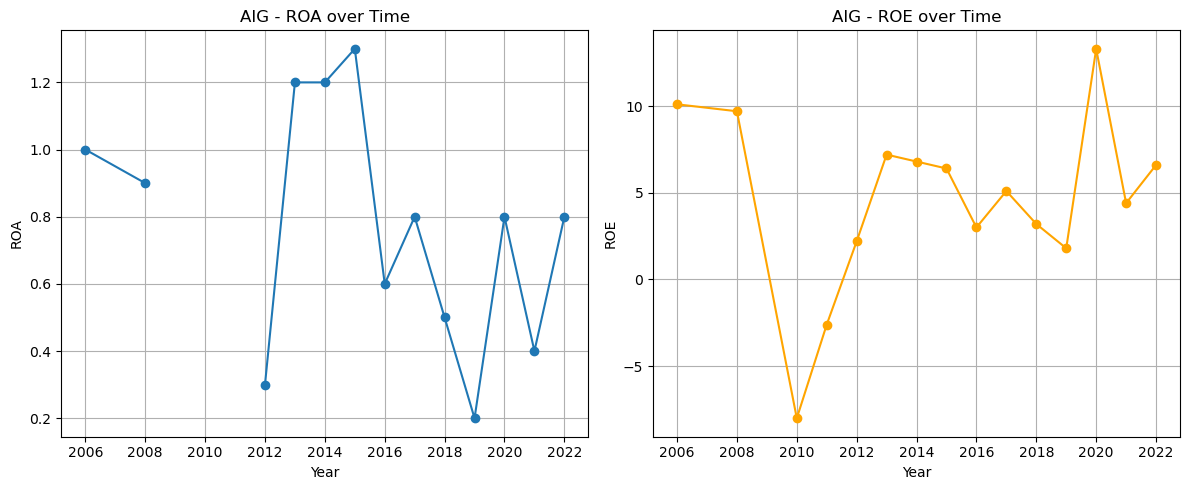

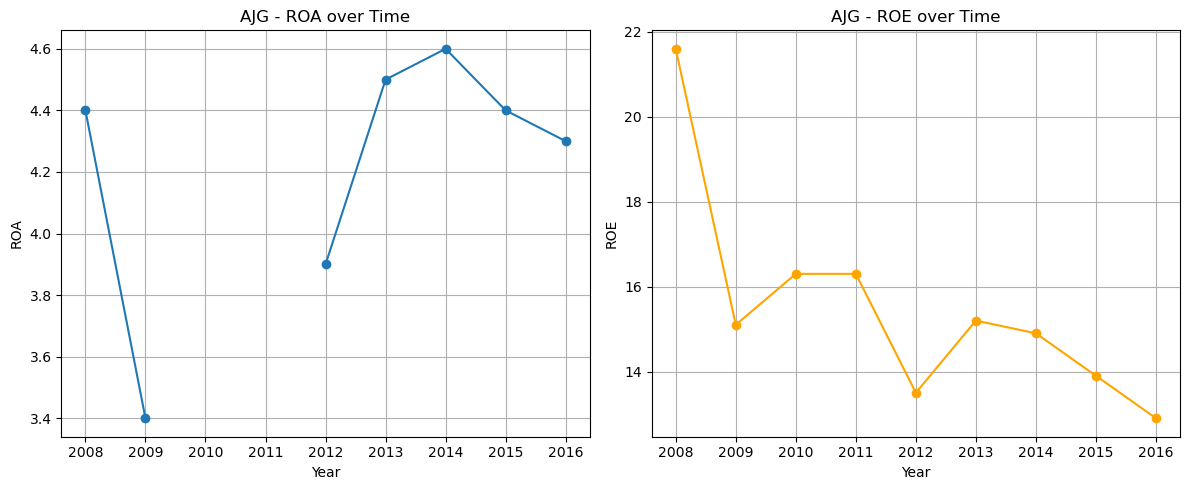

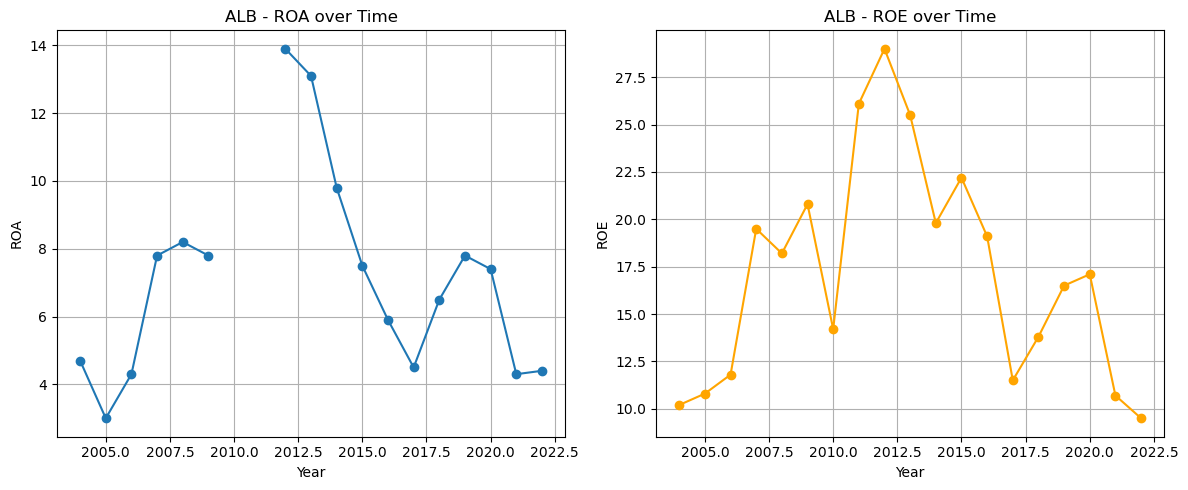

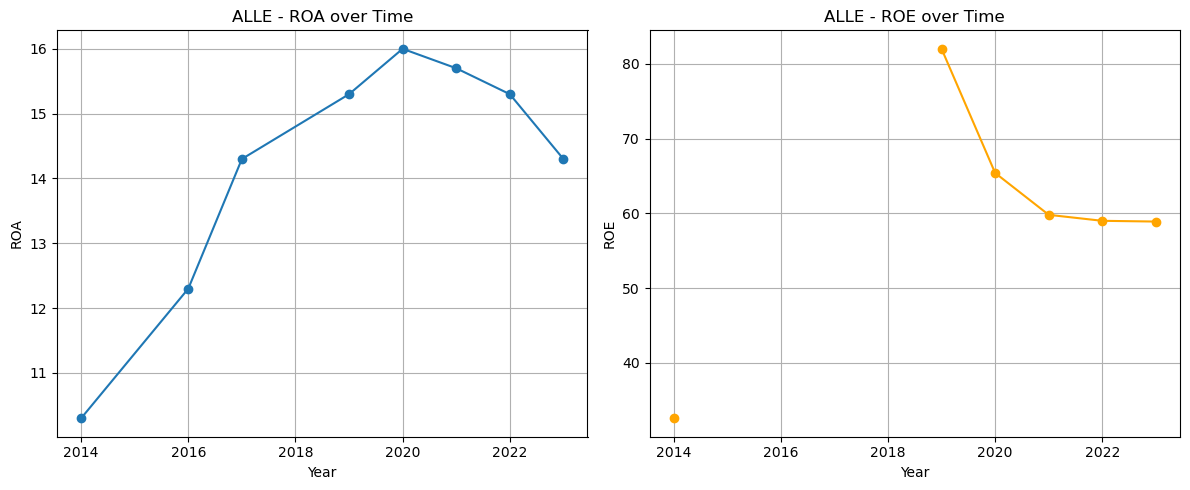

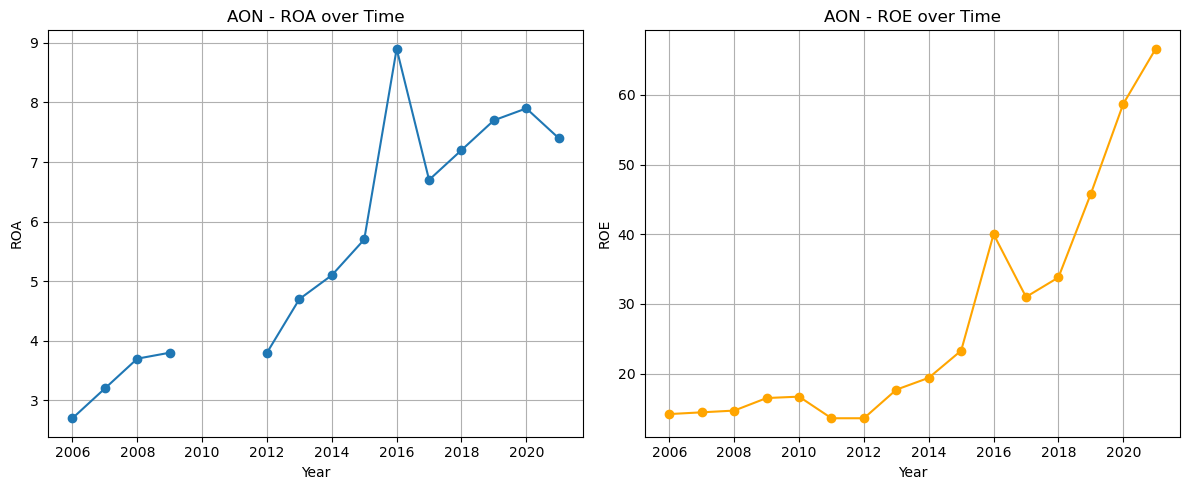

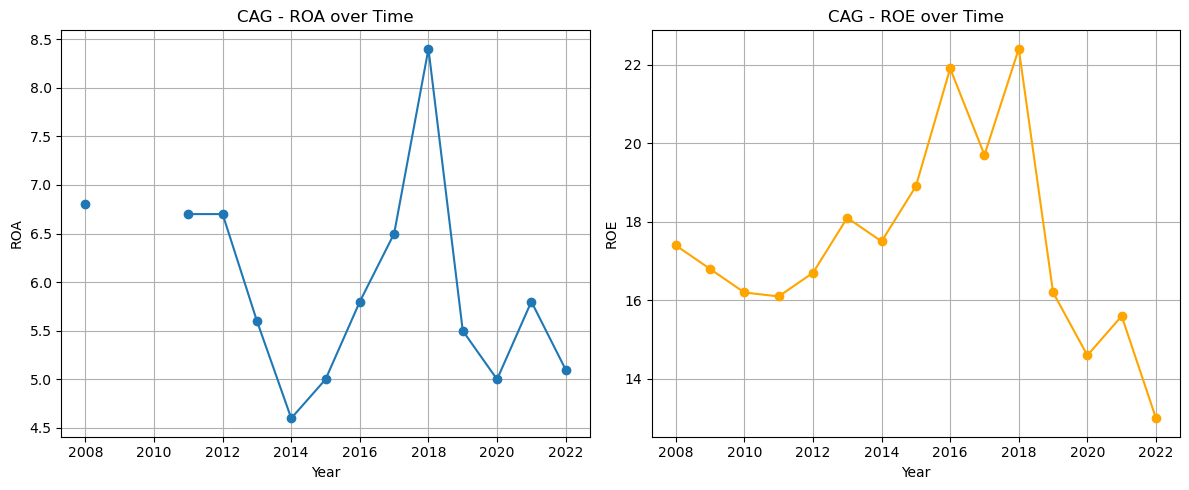

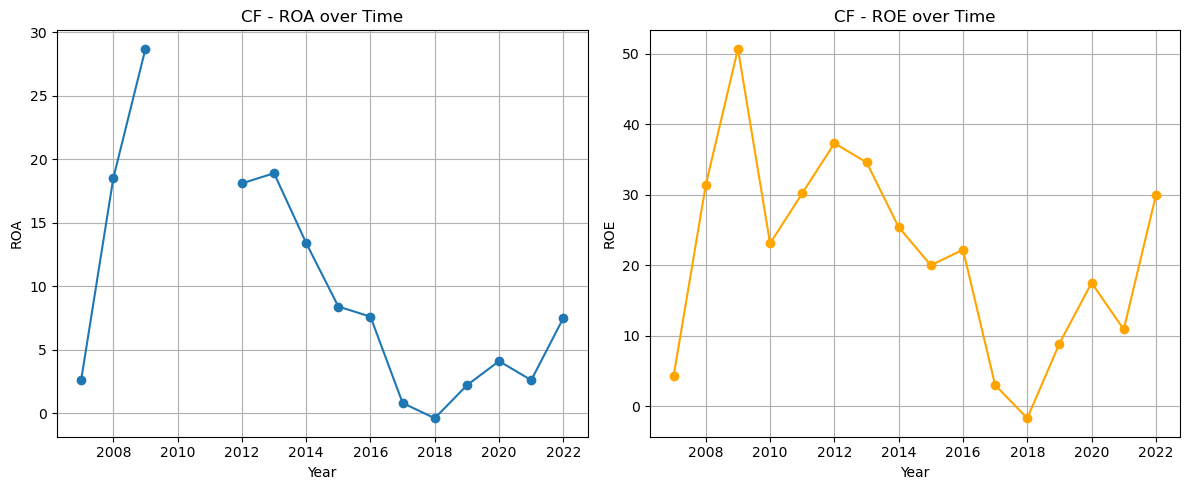

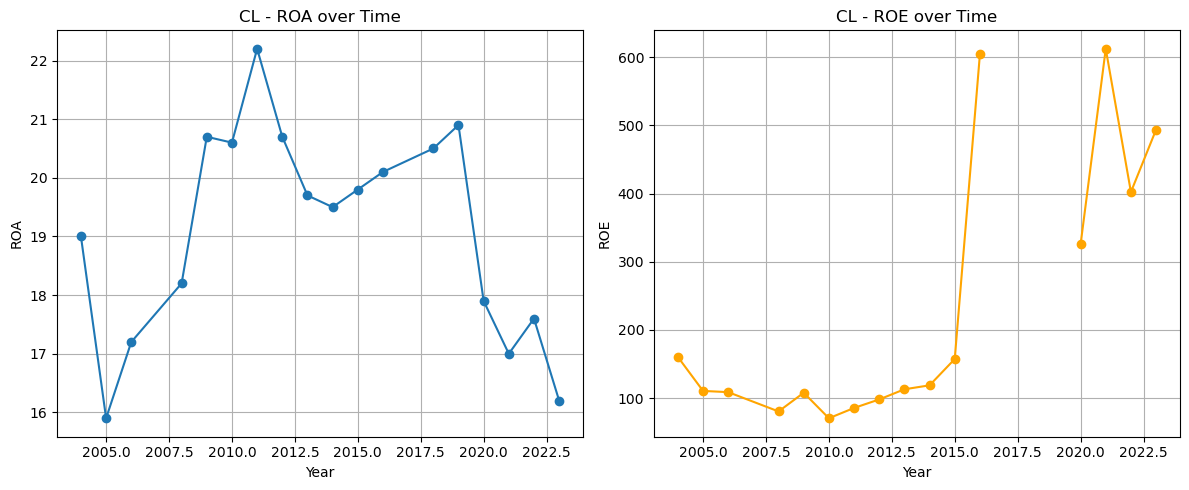

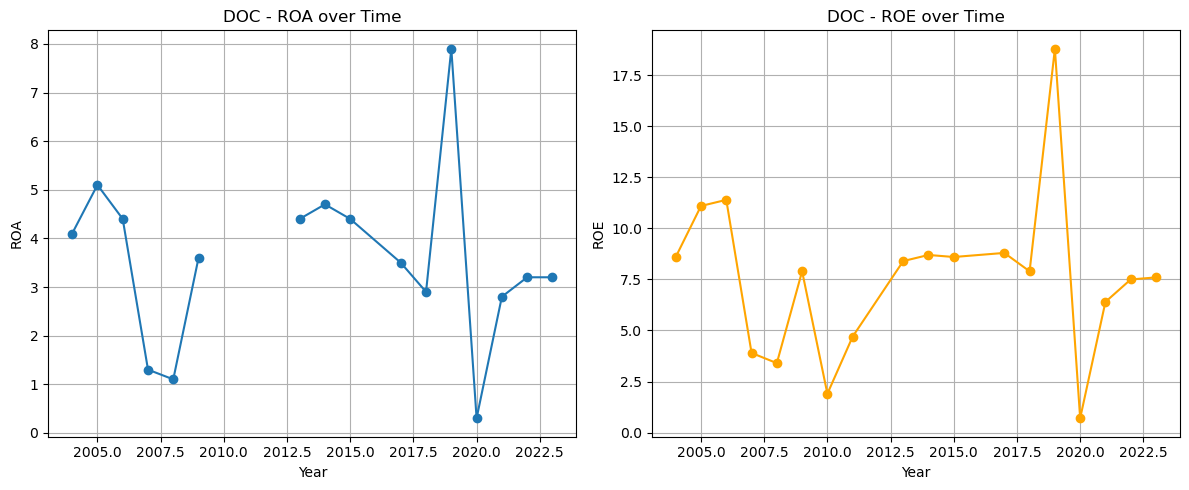

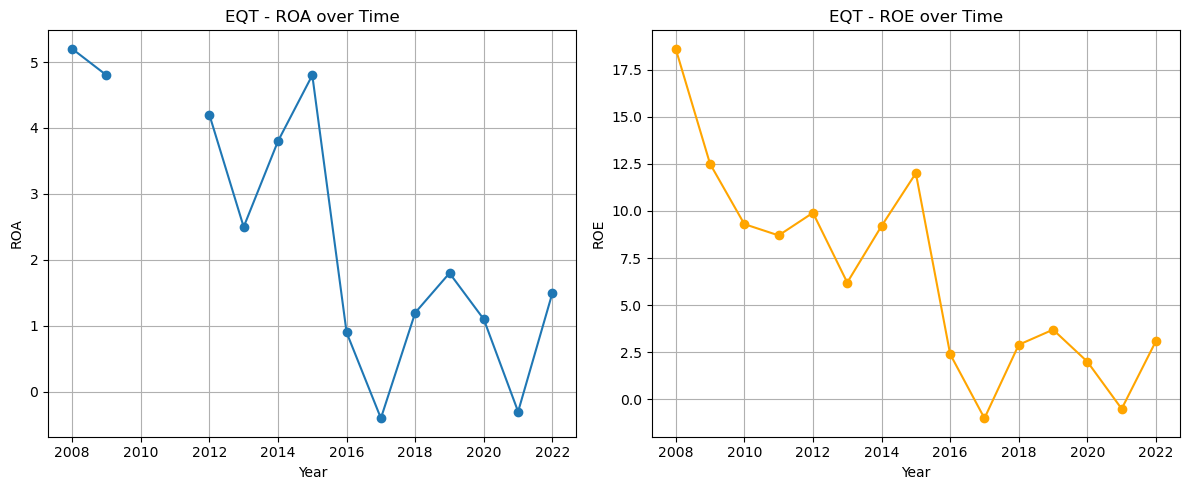

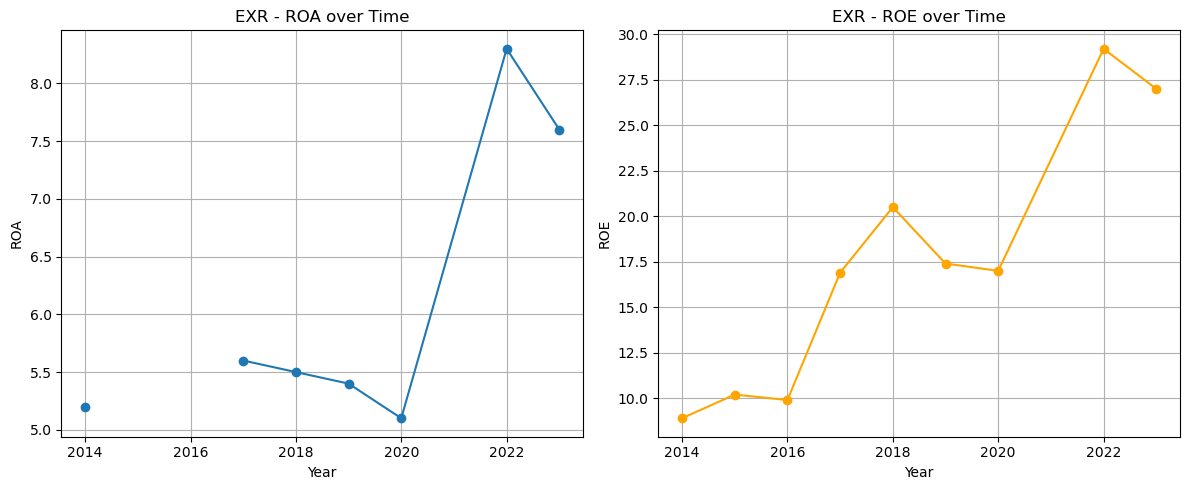

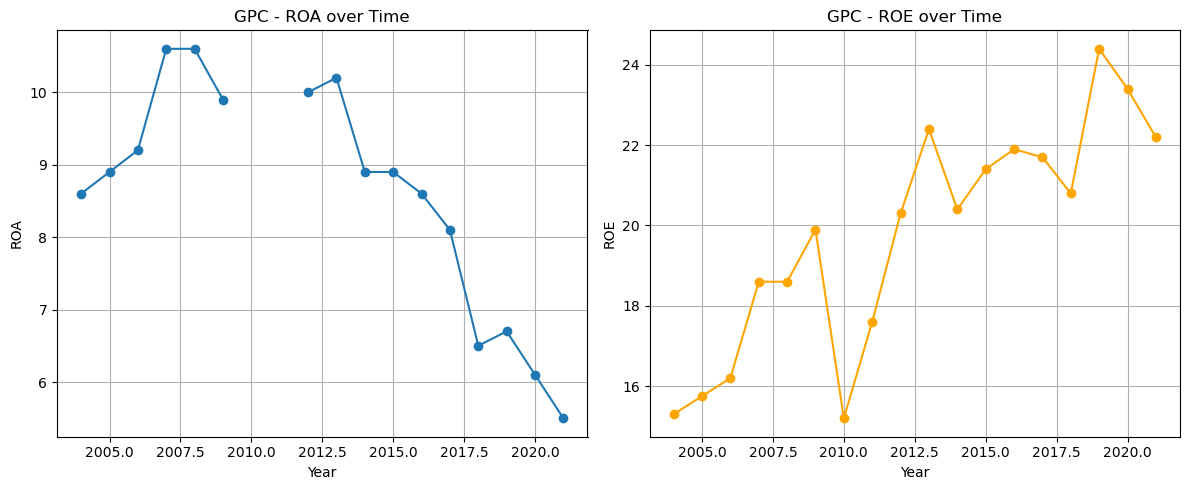

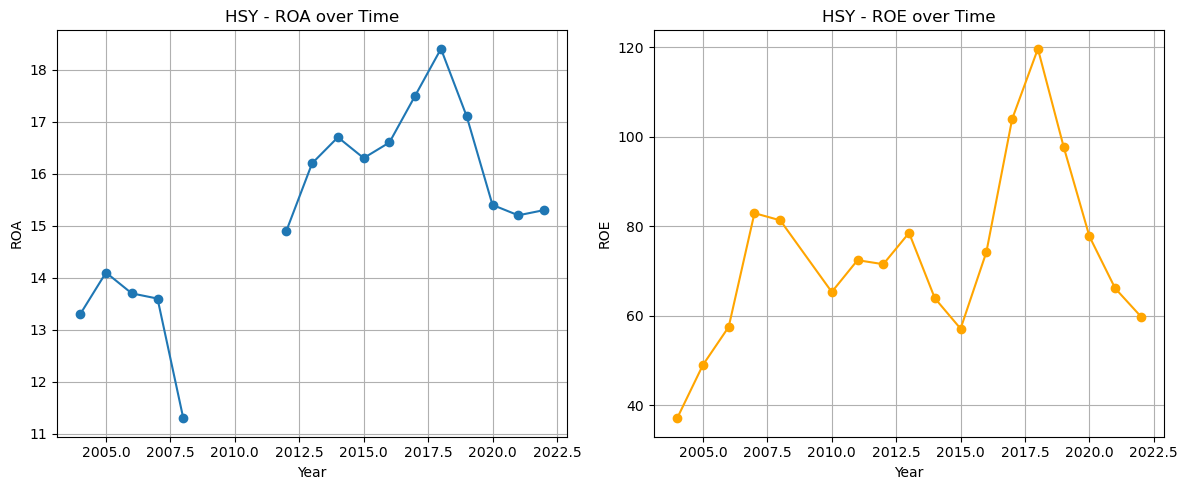

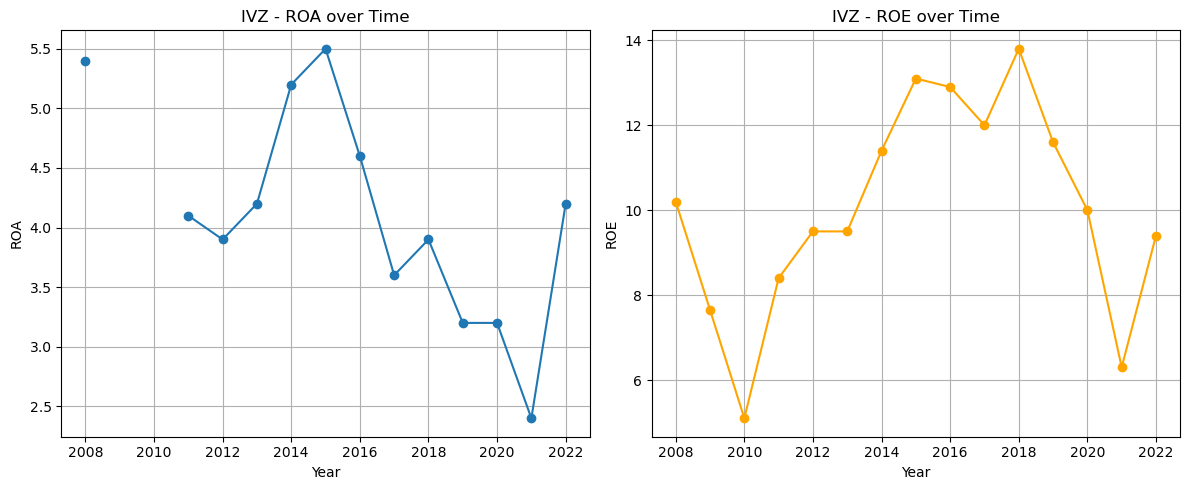

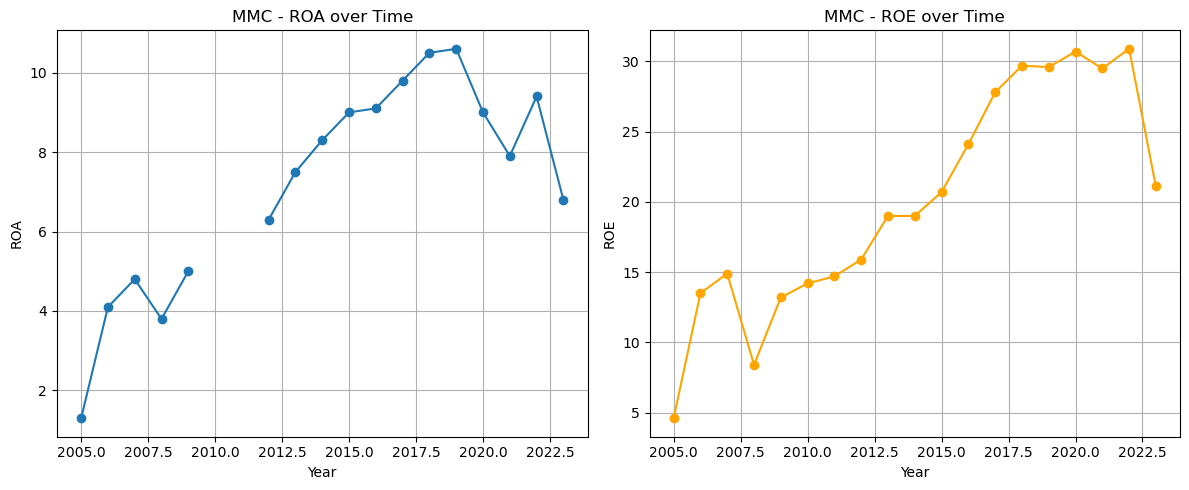

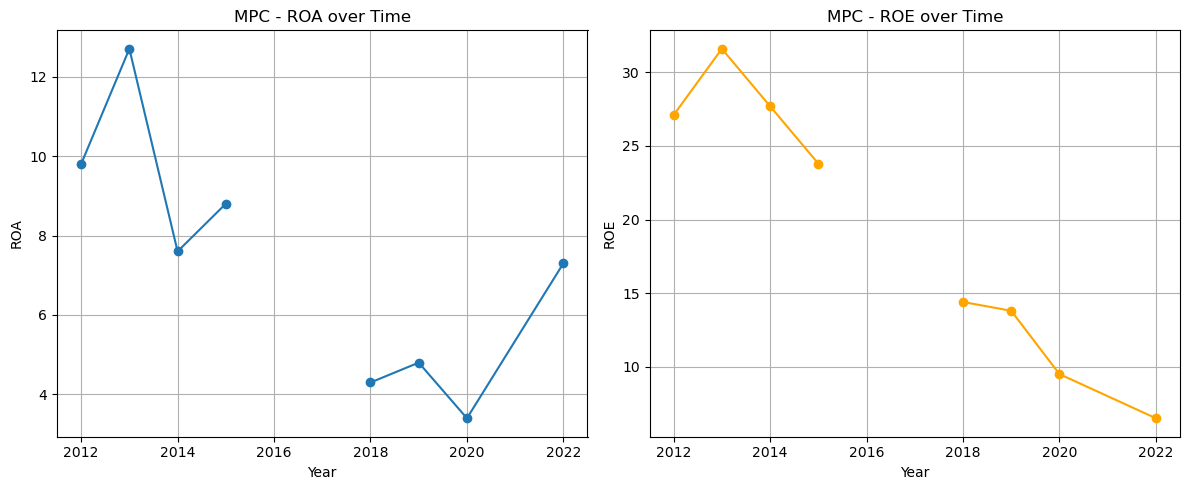

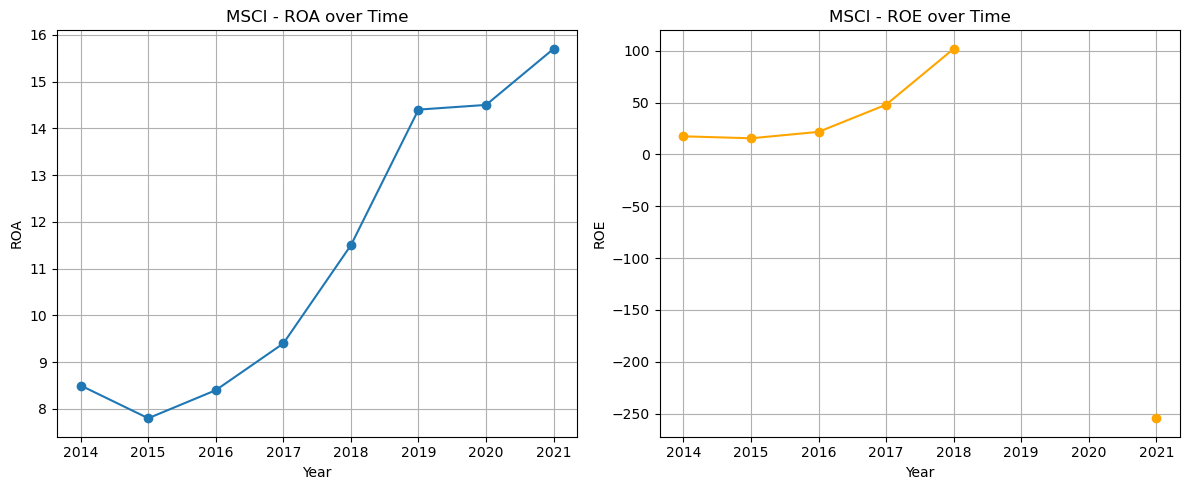

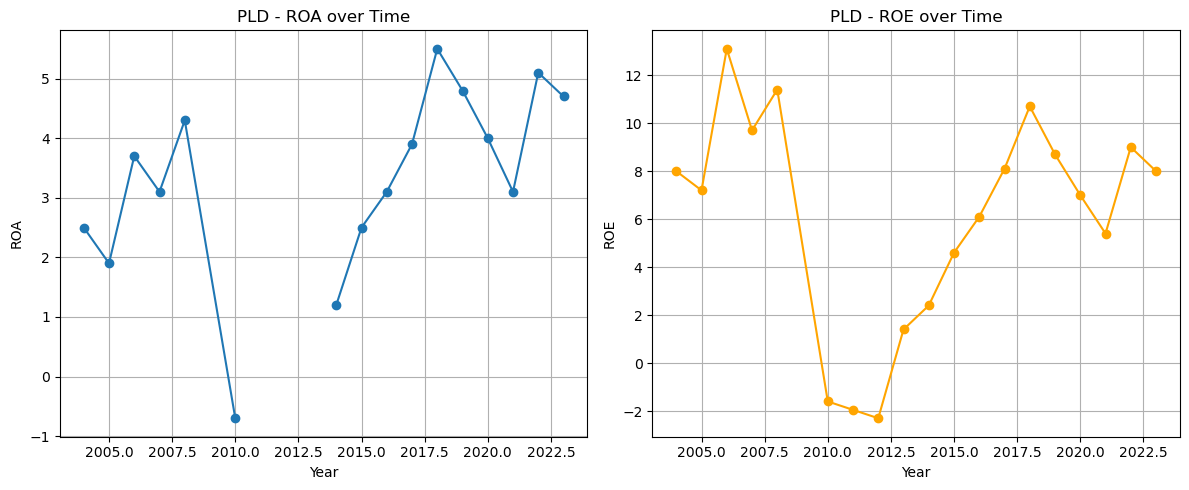

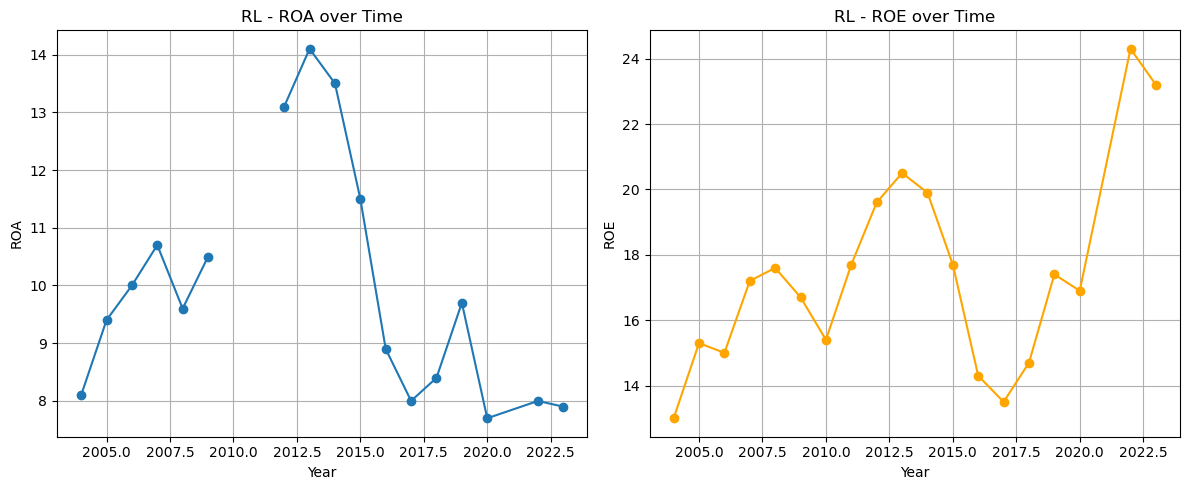

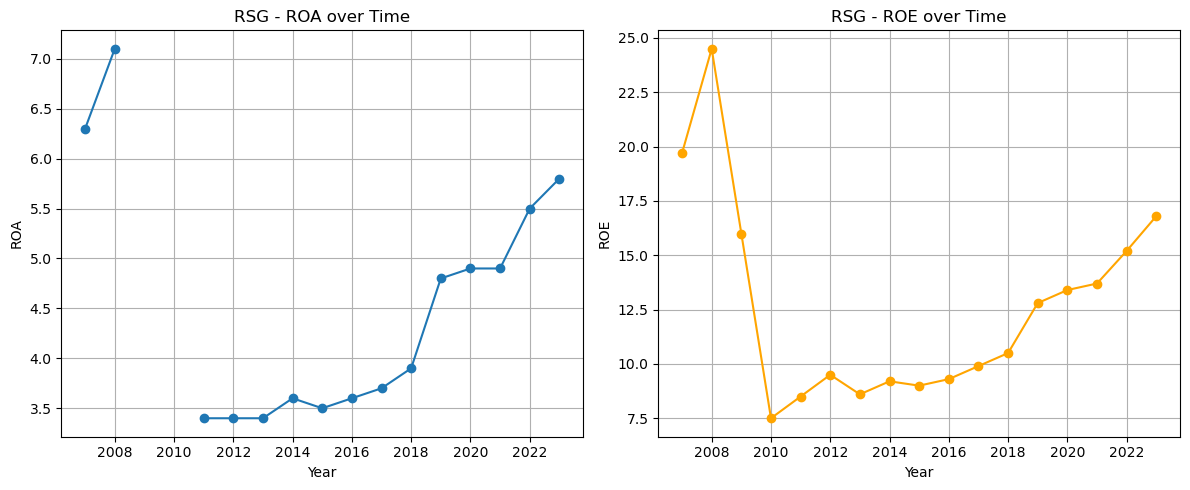

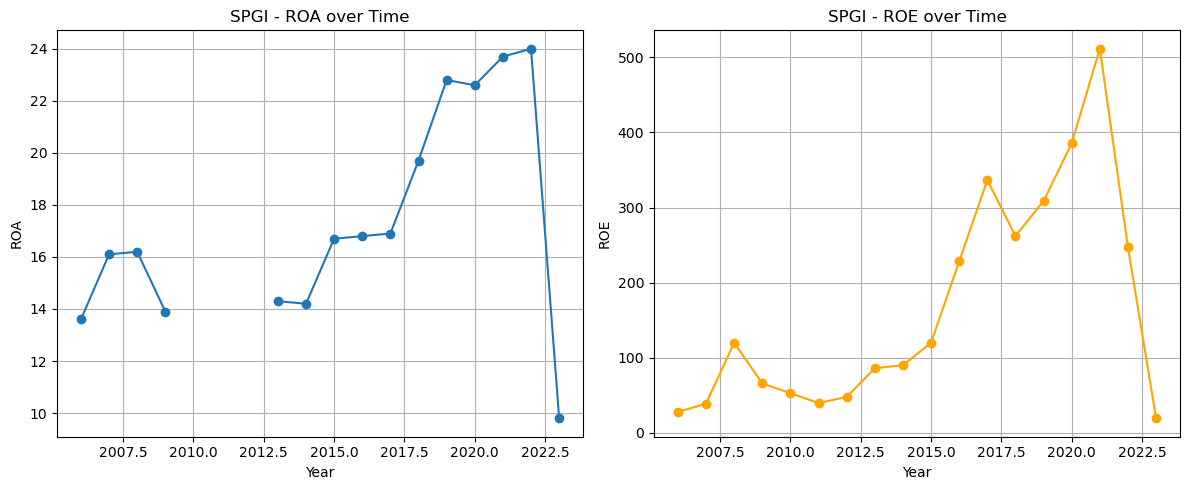

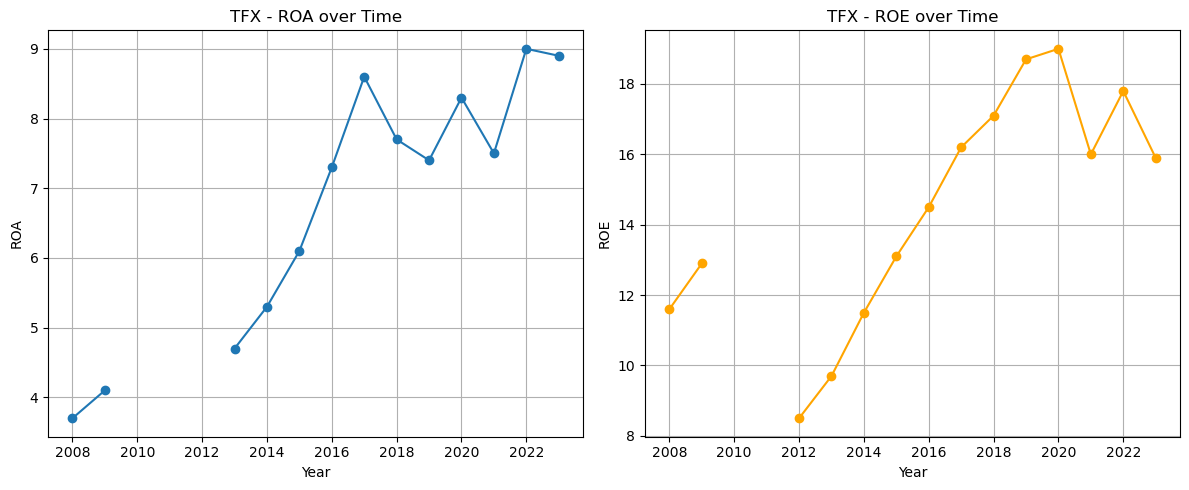

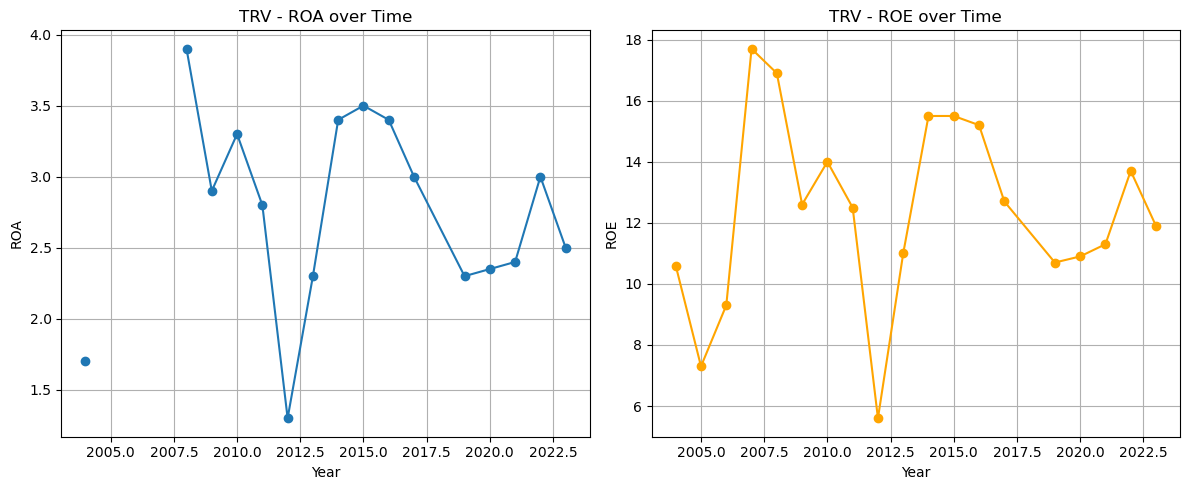

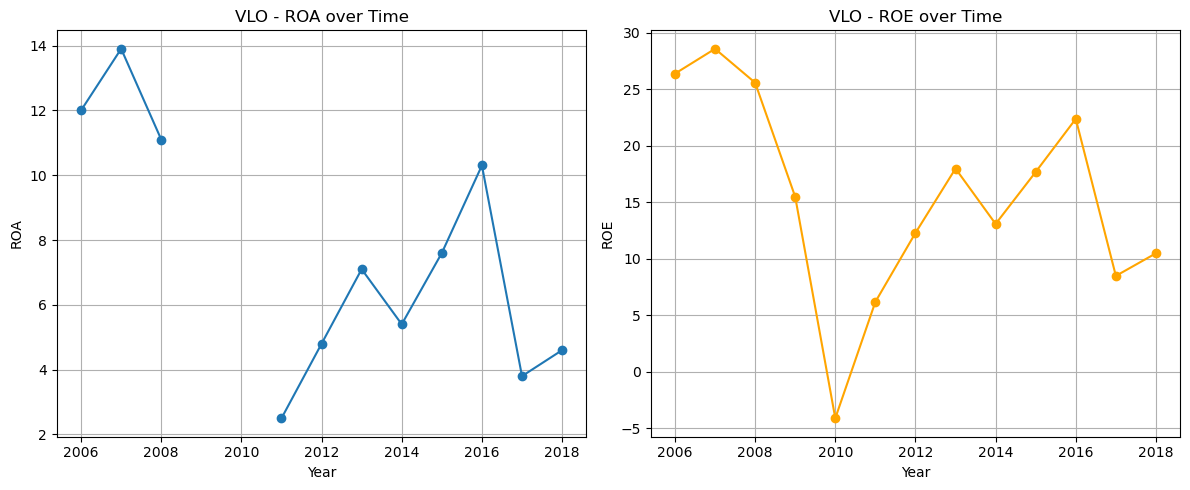

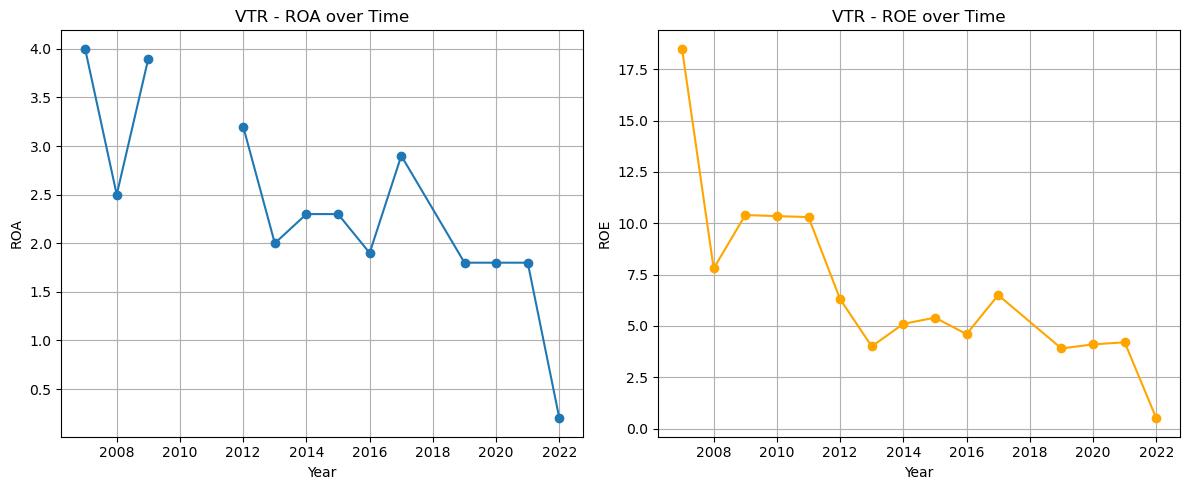

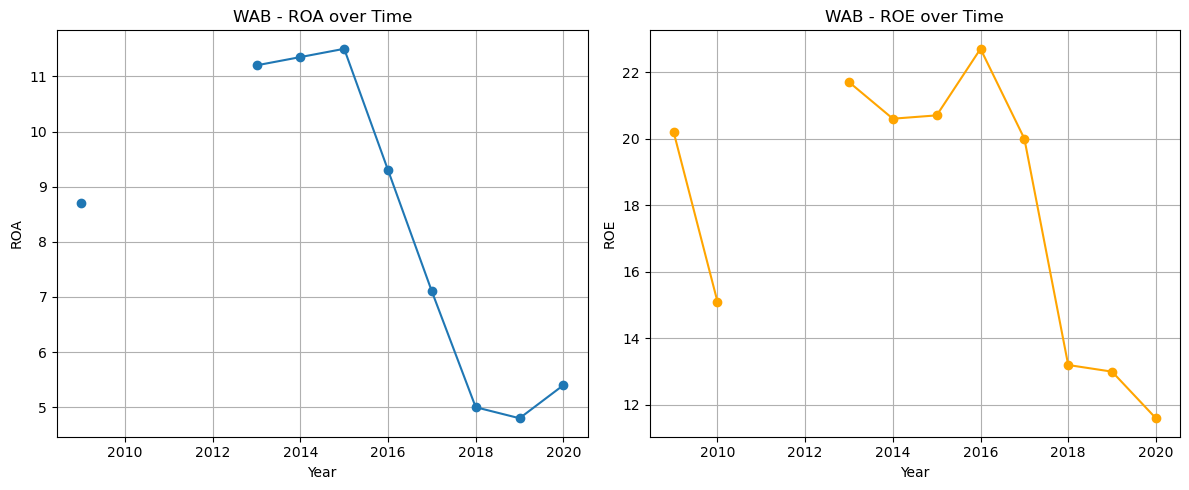

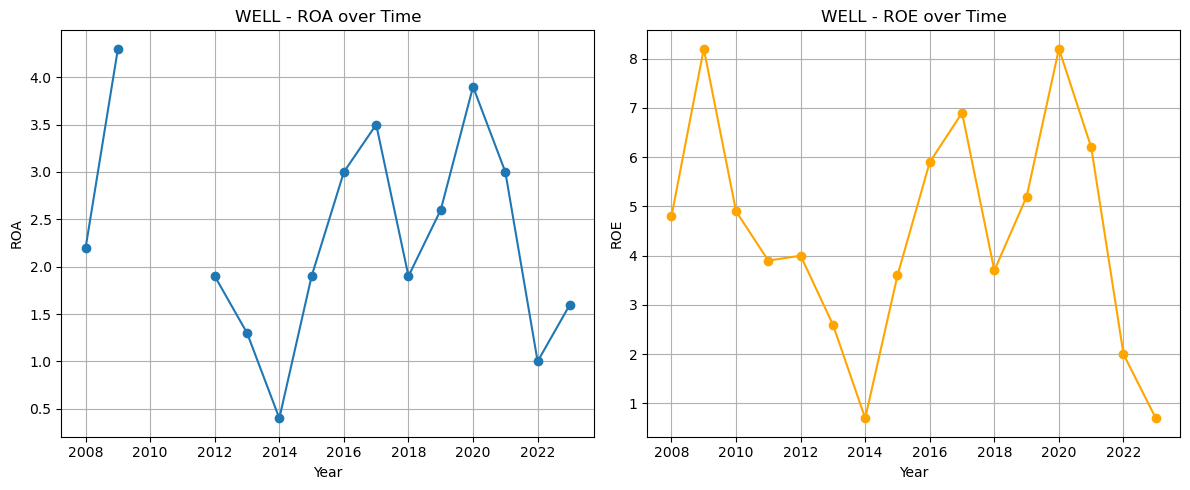

In [59]:
import matplotlib.pyplot as plt

# Step 1: Find companies with NaNs in ROA or ROE
nan_companies = df_cleaned[df_cleaned[['ROA', 'ROE']].isna().any(axis=1)]['Ticker Symbol'].unique()

# Step 2: Plot ROA and ROE over time for each of these companies
for ticker in nan_companies:
    company_data = df_cleaned[df_cleaned['Ticker Symbol'] == ticker].sort_values('Year')

    plt.figure(figsize=(12, 5))

    # ROA plot
    plt.subplot(1, 2, 1)
    plt.plot(company_data['Year'], company_data['ROA'], marker='o', linestyle='-')
    plt.title(f'{ticker} - ROA over Time')
    plt.xlabel('Year')
    plt.ylabel('ROA')
    plt.grid(True)

    # ROE plot
    plt.subplot(1, 2, 2)
    plt.plot(company_data['Year'], company_data['ROE'], marker='o', linestyle='-', color='orange')
    plt.title(f'{ticker} - ROE over Time')
    plt.xlabel('Year')
    plt.ylabel('ROE')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

### Implement the remaining NaN's

In [61]:
import numpy as np
import pandas as pd

def custom_linear_fill(group, column):
    values = group[column].values.copy()

    i = 0
    while i < len(values):
        if np.isnan(values[i]):
            start = i
            # Count how many NaNs in a row
            while i < len(values) and np.isnan(values[i]):
                i += 1
            end = i

            # Now fill values[start:end]
            val_before = values[start - 1] if start - 1 >= 0 else np.nan
            val_after = values[end] if end < len(values) else np.nan

            if not np.isnan(val_before) and not np.isnan(val_after):
                step = (val_after - val_before) / (end - start + 1)
                for j in range(start, end):
                    values[j] = val_before + step * (j - start + 1)
            # If one of the bounds is NaN, we can't fill – leave them as NaN
        else:
            i += 1

    group[column] = values
    return group

# Apply this for each company and each variable
for col in ['ROA', 'ROE']:
    df_cleaned = df_cleaned.groupby('Ticker Symbol', group_keys=False).apply(lambda g: custom_linear_fill(g.sort_values('Year'), col))


C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_12808\1964315074.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_cleaned = df_cleaned.groupby('Ticker Symbol', group_keys=False).apply(lambda g: custom_linear_fill(g.sort_values('Year'), col))
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_12808\1964315074.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_cleaned = df_cleaned.groupby('Ticker Sym

In [62]:
nan_per_column = df_cleaned.isna().sum()
print(nan_per_column)

Company Name                    0
Ticker Symbol                   0
NAICS National Industry Name    0
Year                            0
EPS                             0
ROA                             0
ROE                             0
ESG_score                       0
Env_score                       0
Soc_score                       0
Gov_score                       0
ESG_Comb_score                  0
MarketCap                       0
dtype: int64


In [63]:
df_cleaned

,Company Name,Ticker Symbol,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap
0,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2007,1.82,9.8,22.8,74.71,62.36,87.40,63.75,74.71,1.018590e+10
1,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2008,1.96,9.8,28.5,78.14,60.83,86.38,75.37,56.93,5.553723e+09
2,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2009,0.80,3.7,11.2,72.79,77.60,82.29,58.04,61.40,6.105464e+09
3,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2010,2.00,7.3,22.2,75.00,73.20,87.21,59.77,75.00,8.619436e+09
4,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2011,2.95,11.2,27.9,78.09,77.28,89.17,63.89,78.09,9.204053e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2019,3.13,15.8,77.1,59.13,54.75,65.89,52.25,59.13,6.303821e+10
4595,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2020,3.64,15.7,71.7,64.81,56.85,77.76,50.80,64.81,7.865682e+10
4596,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2021,3.85,14.7,50.0,65.85,64.32,77.45,49.63,65.85,1.154569e+11
4597,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2022,4.70,16.3,53.9,72.22,65.93,78.24,67.85,72.22,6.830285e+10


In [115]:
# Export to Excel
df_cleaned.to_excel('final_cleaned_data_USA.xlsx', index=False, engine='openpyxl')